In [1]:
from topological_codes import XZZXDecoder
import numpy as np
import pandas as pd
import multiprocessing as mp
import time
from itertools import product
import networkx as nx

In [2]:
shots = 10

t1 = t2 = t3 = 0

decoder = XZZXDecoder({"d": 3, "T":1, "p": 0.04, "eta": 1, "bias": "Z"})

for s in range(shots):
    err_syndrome, xL, zL, flipped = decoder.get_error_syndrome()
    print(err_syndrome)
    error_graph = decoder._make_error_graph(err_syndrome, multi=False)
    matches_a = decoder._run_mwpm(error_graph["A"]) 
    print(matches_a)
    matches_b = decoder._run_mwpm(error_graph["B"])
    print(matches_b)
    xL_a, zL_a = decoder.error_correct(matches_a)
    xL_b, zL_b = decoder.error_correct(matches_b)
    xL_t = xL_a + xL_b
    zL_t = zL_a + zL_b

    if xL_t % 2 != xL % 2 or zL_t % 2 != zL % 2:
        t1 += 1
    if xL_t % 2 != xL % 2:
        t2 += 1
    if zL_t % 2 != zL % 2:
        t3 += 1
    print(xL, zL)
    print(xL_t, zL_t)
    print("============================")

t1 = t1/shots
t2 = t2/shots
t3 = t3/shots

print(t1, t2, t3)

{'A': [], 'B': []}
[]
[]
0 0
0 0
{'A': [(0, 0.5, 0.5), (0, 1.5, -0.5)], 'B': [(0, 1.5, 0.5)]}
[((0, 1.5, -0.5), (0, 0.5, 0.5))]
[((0, 1.5, 0.5), (-1, 2.5, -0.5))]
1 0
0 0
{'A': [(0, 1.5, 1.5)], 'B': [(0, -0.5, 0.5)]}
[((0, 1.5, 1.5), (-1, 2.5, 0.5))]
[((0, -0.5, 0.5), (-1, 0.5, -0.5))]
1 0
1 0
{'A': [], 'B': [(0, 0.5, 1.5)]}
[]
[((-1, -0.5, 2.5), (0, 0.5, 1.5))]
0 1
0 1
{'A': [], 'B': [(0, 0.5, 1.5)]}
[]
[((-1, -0.5, 2.5), (0, 0.5, 1.5))]
0 1
0 1
{'A': [], 'B': []}
[]
[]
0 0
0 0
{'A': [], 'B': []}
[]
[]
0 0
0 0
{'A': [], 'B': []}
[]
[]
0 0
0 0
{'A': [], 'B': [(0, 1.5, 0.5)]}
[]
[((0, 1.5, 0.5), (-1, 2.5, -0.5))]
0 0
0 0
{'A': [], 'B': []}
[]
[]
0 0
0 0
0.1 0.1 0.0


In [7]:
def Simulate(d, p):
    fhandle = open("test.csv", "a")
    
    shots = 10000
    
    t1 = t2 = t3 = 0
    
    decoder = XZZXDecoder({"d": d, "T":1, "p": p, "eta": 1, "bias": "Z"})
    
    for s in range(shots):
        err_syndrome, xL, zL, flipped = decoder.get_error_syndrome()
        error_graph = decoder._make_error_graph(err_syndrome, multi=False)
        matches_a = decoder._run_mwpm(error_graph["A"]) 
        matches_b = decoder._run_mwpm(error_graph["B"])
        xL_a, zL_a = decoder.error_correct(matches_a)
        xL_b, zL_b = decoder.error_correct(matches_b)
        xL_t = xL_a + xL_b
        zL_t = zL_a + zL_b

        if xL_t % 2 != xL % 2 or zL_t % 2 != zL % 2:
            t1 += 1
        if xL_t % 2 != xL % 2:
            t2 += 1
        if zL_t % 2 != zL % 2:
            t3 += 1

    t1 = t1/shots
    t2 = t2/shots
    t3 = t3/shots
    
    df = pd.DataFrame([[d, p, t1, t2, t3]])
    df.to_csv(fhandle, header=False)
    print(d, round(p,3), t1, t2, t3)
    
    return


if __name__ == '__main__':
    starttime = time.time()
    probs = np.linspace(0.02, 0.08, 3)
    d = [3, 5]
    print("d, pz, t1, t2, t3:\n")
    pool = mp.Pool()
    pool.starmap(Simulate, product(d, probs))
    pool.close()
    print('Time taken = {} seconds'.format(time.time() - starttime))

d, pz, t1, t2, t3:

3 0.02 0.0447 0.0234 0.0231
3 0.05 0.2174 0.1257 0.1193
3 0.08 0.4028 0.2381 0.2395
5 0.02 0.0293 0.0163 0.0138
5 0.05 0.2211 0.1203 0.1221
5 0.08 0.4735 0.2848 0.2803
Time taken = 284.5966341495514 seconds


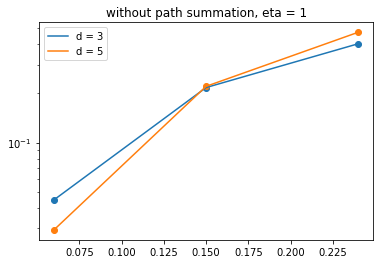

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

eta = [1]
leg = [3,5]

probs = np.array(np.linspace(0.02, 0.08, 3))
probs *= 3

plt.scatter(probs, [0.0447, 0.2174, 0.4028])
plt.plot(probs, [0.0447, 0.2174, 0.4028], label="d = %d" % 3)
plt.scatter(probs, [0.0293, 0.2211, 0.4735])
plt.plot(probs, [0.0293, 0.2211, 0.4735], label="d = %d" % 5)


plt.yscale("log")
plt.title("without path summation, eta = %d" % 1)
plt.legend()
plt.show()
